# Text processing of the ChiLit Corpus for Topic Modelling
##### Sandra Mickwitz, Matricola 5304369, sandra.mickwitz01@icatt.it, Università Cattolica del Sacro Cuore, 
##### 30. January 2025

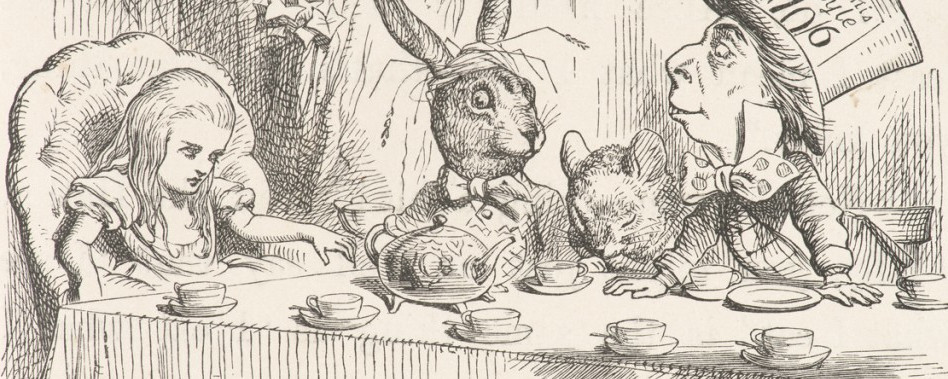

### Introduction
This notebook contains all the steps needed to preprocess the ChiLit corpus for the Topic Modelling LDA package used from the `OCTIS library`. `Python` version 3.9 has been used. 

### ChiLit Corpus Description
In this notebook the `ChiLit Corpus` has been used, the corpus can be found here: https://github.com/mahlberg-lab/corpora/tree/a020b2a7153baf8849056be833861ecb3d77e7a1/ChiLit

| **Metric**              | **Unprocessed Files** | **Processed Files** | **Why the Change?** |
|-------------------------|----------------------|----------------------|----------------------|
| **Total Words (Tokens)** | 5,404,761            | 2,191,892            | Stopwords & punctuation removed |
| **Unique Words (Tokens)** | 70,728               | 51,673               | Slight reduction, but more meaningful words remain |
| **Lexical Richness**     | 0.0131               | 0.0236               | Fewer redundant words, unique word ratio increased |


#### Let's import the libraries!
This script processes a text corpus using `NLTK` (Natural Language Toolkit). It loads plain text files from a directory, tokenizes words, and prepares them for further text analysis. It also includes stopword removal and punctuation handling, which helps clean the text for tasks like topic modeling, sentiment analysis, or NLP applications.

In [136]:
# Import necessary libraries
import os  # Provides functions for interacting with the operating system (e.g., file handling)
import nltk  # Natural Language Toolkit for text processing
import string  # Built-in module for handling punctuation

# Import NLTK tools for text processing
from nltk.corpus.reader.plaintext import PlaintextCorpusReader  # Reads plain text files as a corpus
from nltk.tokenize import word_tokenize  # Tokenizes text into words
from nltk.corpus import stopwords  # Provides a list of common stopwords (e.g., "the", "is", "and")

#### Ensure necessary NLTK resources are available

This part of the script downloads necessary NLTK resources before performing text processing. The `punkt tokenizer` is required for word and sentence tokenization, while the `stopwords` dataset provides a list of common words to be removed (e.g., "the", "is", "and"). These downloads ensure the script can process text efficiently without missing dependencies.

In [103]:
# Ensure necessary NLTK resources are available
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/francesco.passone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco.passone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Directory path
This code defines a directory path `Text_Processing` where text files for processing are stored and then checks whether the directory exists in the system. This is useful to ensure that the script can proceed without errors when attempting to read or write files.

In [105]:
# Define the directory where text files are stored
corpus_dir = 'Text_Processing'

# Check if the specified directory exists in the system
# Returns True if the directory exists, otherwise False
os.path.isdir(corpus_dir)

True

#### Loading the files from the selected directory 
This code loads all text files from the specified directory `corpus_dir` using NLTK's `PlaintextCorpusReader`, which allows for easy access and processing of textual data. The method `fileids()` in NLTK's `PlaintextCorpusReader` returns a list of filenames for all text files in the corpus directory that match the specified pattern. After loading the corpus, it prints the number of text files detected, ensuring that the directory contains valid input files for further processing.

In [107]:
# Load all .txt files from the specified directory as a text corpus
# '.*\.txt' is a regular expression that matches all files with a .txt extension
corpus = PlaintextCorpusReader(corpus_dir, fileids=r'.*\.txt')

# Print the total number of text files found in the directory
print(len(corpus.fileids()))# Displays the count of .txt files loaded into the corpus

1


#### Processes a text corpus stored in the ChiLit directory. 

Following steps are executed:
Loads the text files using NLTK’s `PlaintextCorpusReader`.
Calculates corpus statistics, such as:
Total number of documents.
Total words and unique words.
Lexical richness (a measure of vocabulary diversity).
Saves the processed text to a `.tsv` file, where each document is stored as a row, and the partition is labeled as "train" for topic modeling or further analysis.

In [178]:
corpus_dir = 'ChiLit'
os.path.isdir(corpus_dir) # os is a built-in library that allows interaction with the operating system. It provides functions for handling files, directories, environment variables, and system operations.

corpus = PlaintextCorpusReader(corpus_dir, fileids=r'.*\.txt')
print(len(corpus.fileids()))

# Print corpus statistics before processing
num_documents = len(corpus.fileids())
all_text = corpus.raw() # .raw() method returns the full text of the corpus as a single string.
all_tokens = word_tokenize(all_text)
unique_tokens = set(all_tokens)

# Calculate lexical richness: unique words / total words
lexical_richness = len(unique_tokens) / len(all_tokens) if len(all_tokens) > 0 else 0


print(f"Corpus Statistics:")
print(f"Total Documents: {num_documents}")
print(f"Total Words: {len(all_tokens)}")
print(f"Unique Words: {len(unique_tokens)}")
print(f"Average Words per Document: {len(all_tokens) / num_documents if num_documents > 0 else 0:.2f}")
print(f"Lexical Richness: {lexical_richness:.4f} (Unique Words / Total Words)")


# Output TSV file
output_tsv = "corpus.tsv"


#Create the TSV file
with open(output_tsv, "w", encoding="utf-8", newline="") as tsvfile:
    writer = csv.writer(tsvfile, delimiter="\t")
    
    # Write the header
    writer.writerow(["Document", "Partition"])
    
    # Extract each document and write to the TSV file
    for file_id in corpus.fileids():
        # Read the document text (one document per row)
        document_text = corpus.raw(file_id).strip()  # Full text of the document, stripped of extra whitespace
        
        # Ensure one text per row in the TSV file
        if document_text:  # Skip empty documents
            
        # Write the document and explicitly set 'train' for the Partition column
            writer.writerow([document_text, "train"])

print(f"TSV file successfully created: {output_tsv}")

71
Corpus Statistics:
Total Documents: 71
Total Words: 5404761
Unique Words: 70728
Average Words per Document: 76123.39
Lexical Richness: 0.0131 (Unique Words / Total Words)
TSV file successfully created: corpus.tsv


#### Load English stopwords
`stopwords.words('english')` retrieves a list of stopwords from NLTK’s stopword corpus.
`set(stopwords.words('english'))` converts the list into a set for faster lookups when filtering text.

In [220]:
# Load English stopwords
stop_words = set(stopwords.words('english'))

#### Loads NLP Libraries: Uses NLTK for tokenization, stopword removal, and lemmatization.

1. Cleans Text:
    1. Removes unwanted characters (‘’``--).
    2. Eliminates empty lines.
2. Tokenizes & Lemmatizes:
    1. Tokenization: Splits text into words.
    2. Lemmatization: Converts words into their base form (e.g., running → run).

##### Computes Corpus Statistics:
- Total Tokens: Number of words in the corpus.
- Unique Tokens: Number of distinct words.
- Lexical Richness: Unique words / Total words (higher means richer vocabulary).

Saves Processed Text: Stores cleaned and lemmatized text in vocabulary.txt.

In [226]:
# Tokenization function with stopword and punctuation removal
def tokenize_corpus(corpus):
    all_words = []

    for file_id in corpus.fileids():
        # Read the text of the file
        text = corpus.raw(file_id)

        # Word tokenization
        words = word_tokenize(text)

        # Remove stopwords and punctuation
        filtered_words = [word.lower() for word in words if word.lower() not in stop_words and word not in string.punctuation]

        all_words.extend(filtered_words)

        print(f"Processed file: {file_id} - {len(filtered_words)} words after filtering")

    return all_words

# Apply tokenization
words = tokenize_corpus(corpus)

# Save words to a text file (one word per line)
output_file = "filtered_tokenized_words.txt"
with open(output_file, "w", encoding="utf-8") as f:
    f.write("\n".join(words))  # Each word on a new line

print(f"\nTokenized words saved to {output_file}")

Processed file: alice.txt - 15444 words after filtering
Processed file: alone.txt - 14457 words after filtering
Processed file: amulet.txt - 40887 words after filtering
Processed file: beauty.txt - 29132 words after filtering
Processed file: brass.txt - 40526 words after filtering
Processed file: bunny.txt - 614 words after filtering
Processed file: canada.txt - 55570 words after filtering
Processed file: carved.txt - 20693 words after filtering
Processed file: clive.txt - 61030 words after filtering
Processed file: coral.txt - 49971 words after filtering
Processed file: crofton.txt - 27815 words after filtering
Processed file: cuckoo.txt - 21253 words after filtering
Processed file: daisy.txt - 162510 words after filtering
Processed file: dominics.txt - 61396 words after filtering
Processed file: dove.txt - 58920 words after filtering
Processed file: dragons.txt - 22284 words after filtering
Processed file: dreamdays.txt - 20272 words after filtering
Processed file: duke.txt - 22344 w

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define the regex pattern to remove unwanted characters
pattern = r"[`‘’_+|'/\\-]"

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to clean, tokenize, lemmatize, and analyze corpus
def clean_text_file(input_file, output_file):
    with open(input_file, "r", encoding="utf-8") as f:
        lines = f.readlines()  # Read the file into memory

    # Remove unwanted characters and strip lines
    cleaned_lines = [re.sub(pattern, "", line).strip() for line in lines if line.strip()]

    # Tokenize, lemmatize, and collect unique tokens
    all_tokens = set()
    lemmatized_lines = []

    for line in cleaned_lines:
        words = word_tokenize(line)  # Tokenize
        lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in words]  # Lemmatize
        lemmatized_lines.append(" ".join(lemmatized_words))
        all_tokens.update(lemmatized_words)  # Collect unique tokens using a set

    # Save unique tokens (types) to vocabulary.txt
    with open(output_file, "w", encoding="utf-8") as f:
        f.write("\n".join(sorted(all_tokens)))

    # Compute statistics
    total_tokens = sum(len(word_tokenize(line)) for line in lemmatized_lines)
    unique_tokens = len(all_tokens)
    lexical_richness = unique_tokens / total_tokens if total_tokens > 0 else 0

    print(f"\nCorpus Statistics:")
    print(f"Total Tokens: {total_tokens}")
    print(f"Unique Tokens: {unique_tokens}")
    print(f"Lexical Richness: {lexical_richness:.4f}")
    
    print(f"\nCleaned and lemmatized text saved to {output_file}")

# Output files
input_file = "filtered_tokenized_words.txt"
output_file = "vocabulary.txt"

clean_text_file(input_file, output_file)

print(f"\nTokenized words saved to {output_file}")


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/francesco.passone/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/francesco.passone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/francesco.passone/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
